In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
import datetime
import plotly.express as px

In [9]:
#Loading Original data
original_data='./corona/covid_19_data.csv'

In [10]:
covid_data = pd.read_csv(original_data)

In [11]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2379 entries, 0 to 2378
Data columns (total 8 columns):
SNo                2379 non-null int64
ObservationDate    2379 non-null object
Province/State     1718 non-null object
Country/Region     2379 non-null object
Last Update        2379 non-null object
Confirmed          2379 non-null float64
Deaths             2379 non-null float64
Recovered          2379 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 148.8+ KB


In [12]:
covid_data.shape

(2379, 8)

In [13]:
covid_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [14]:
#Removing SNo and Last Update
try:
    covid_data = covid_data.drop('Last Update', axis=1)
    covid_data = covid_data.drop('SNo', axis=1)
except:
    print('Invalid rows')

In [15]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2379 entries, 0 to 2378
Data columns (total 6 columns):
ObservationDate    2379 non-null object
Province/State     1718 non-null object
Country/Region     2379 non-null object
Confirmed          2379 non-null float64
Deaths             2379 non-null float64
Recovered          2379 non-null float64
dtypes: float64(3), object(3)
memory usage: 111.6+ KB


In [16]:
#Pre-processing
covid_data["ObservationDate"] = covid_data['ObservationDate'].astype('datetime64')
covid_data["Confirmed"] = covid_data['Confirmed'].astype('int64')
covid_data["Deaths"] = covid_data['Deaths'].astype('int64')
covid_data["Recovered"] = covid_data['Recovered'].astype('int64')

In [18]:
#Observation data analysis
covid_data_date=pd.DataFrame(covid_data.groupby(by='ObservationDate').sum())
covid_data_date['Date']=covid_data_date.index
covid_data_date.Date=covid_data_date.Date.apply(lambda x:x.date())

In [19]:
covid_date_melted=pd.melt(covid_data_date,id_vars=['Date'])

In [23]:
def plot_builder(col_name,data_name,**kwargs):
    title = 'Corona Virus 2019-20'
    try:
        title = kwargs['title']
    except:
        title = 'Corona Virus 2020'
    plt.figure(figsize=(10,15))
    plt.xticks(rotation=90)
    plt.xlabel('Date', fontsize=18)
    plt.suptitle(title)
    plot_1=sns.barplot(x='Date',y=col_name,data=data_name)
    plot_1

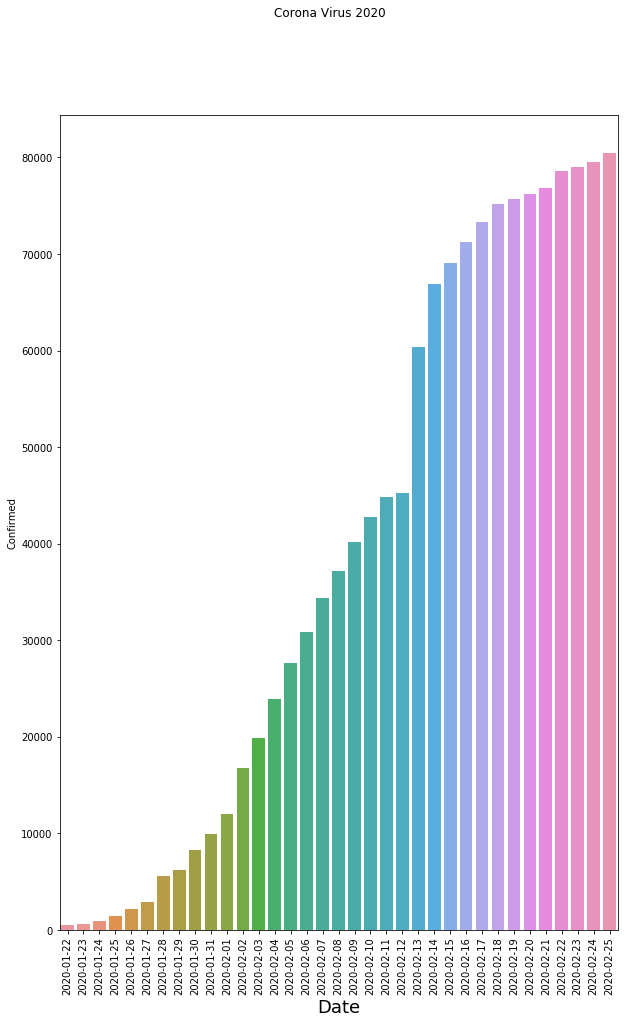

In [24]:
plot_builder('Confirmed',covid_data_date)

In [25]:
#Confirmed cases analysis
covid_data_date_diff=pd.DataFrame(covid_data_date.diff())
covid_data_date_diff['Date']=covid_data_date_diff.index
covid_data_date_diff.Date=covid_data_date_diff.Date.apply(lambda x:x.date())
covid_data_diff_melted = pd.melt(covid_data_date_diff,id_vars=['Date'])

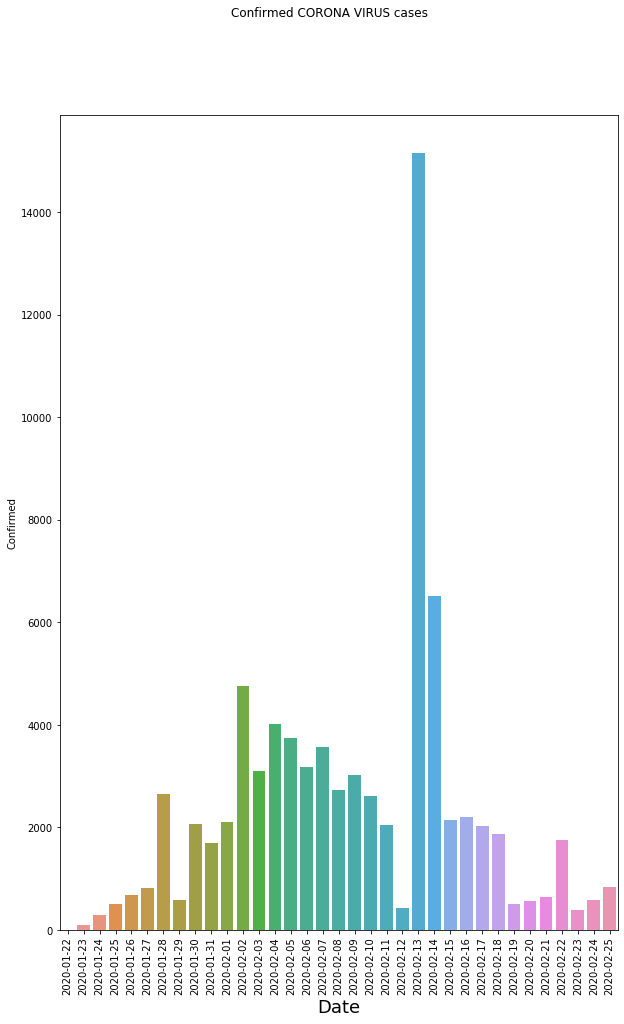

In [27]:
plot_builder('Confirmed',covid_data_date_diff, title='Confirmed CORONA VIRUS cases')

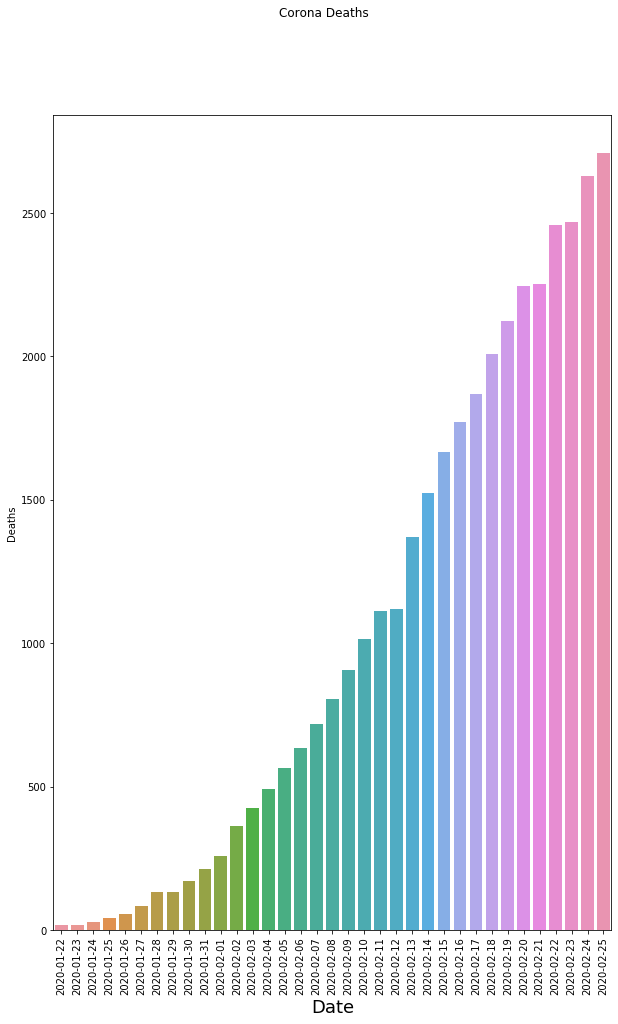

In [29]:
#Corona deaths analysis
plot_builder('Deaths',covid_data_date,title='Corona Deaths')

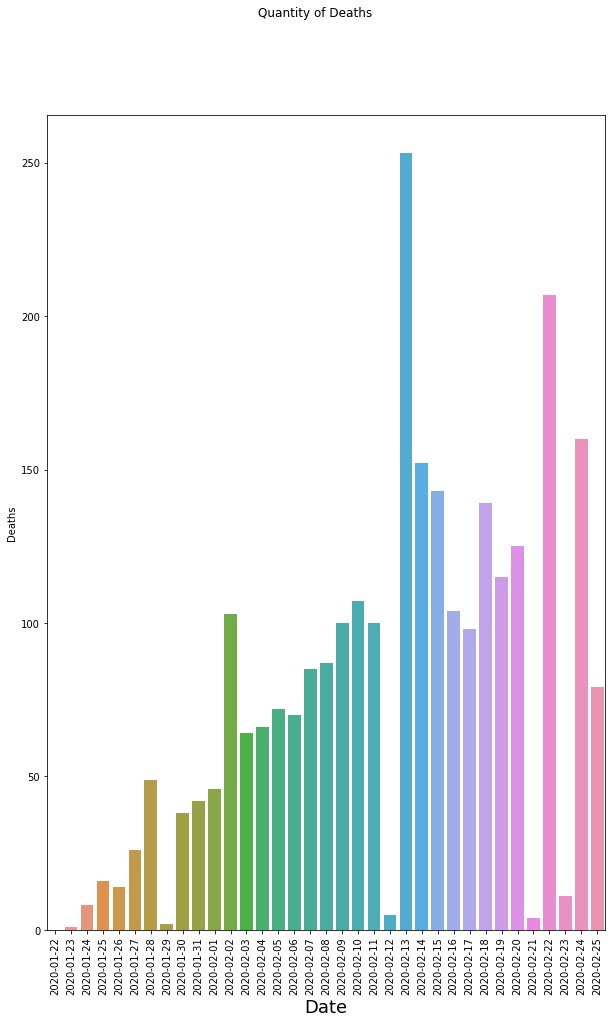

In [30]:
plot_builder('Deaths',covid_data_date_diff,title='Quantity of Deaths ')

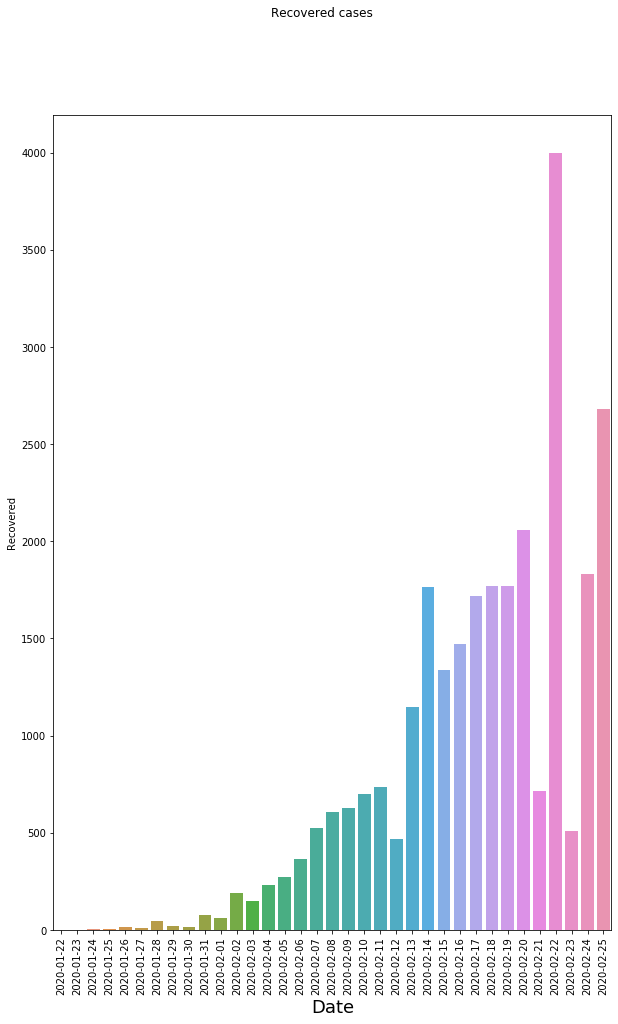

In [32]:
#Recovered cases
plot_builder('Recovered',covid_data_date_diff,title='Recovered cases ')

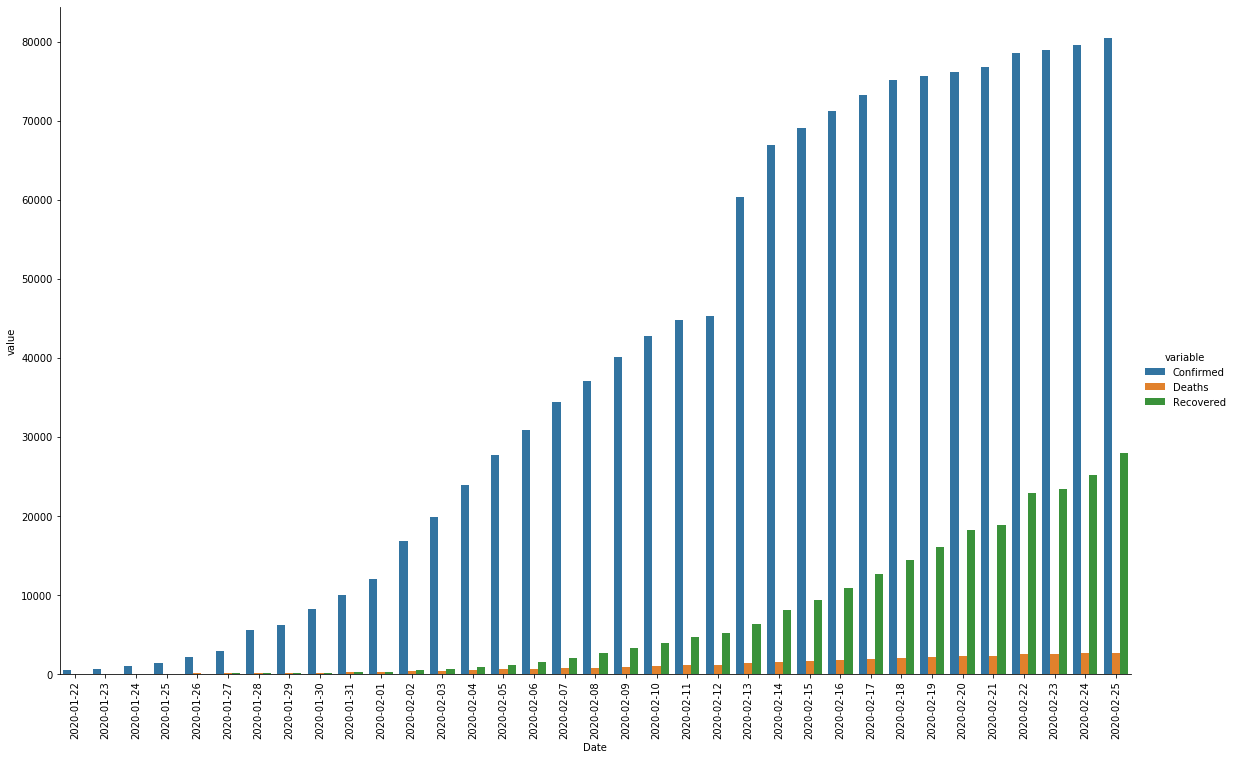

In [34]:
#corona confirmed,deaths and recovered mixed graph
mixed_plot=sns.catplot(x='Date', y='value', hue='variable', data=covid_date_melted, kind='bar',height=10,aspect =1.6,legend=True)
mixed_plot.set_xticklabels( rotation=90)

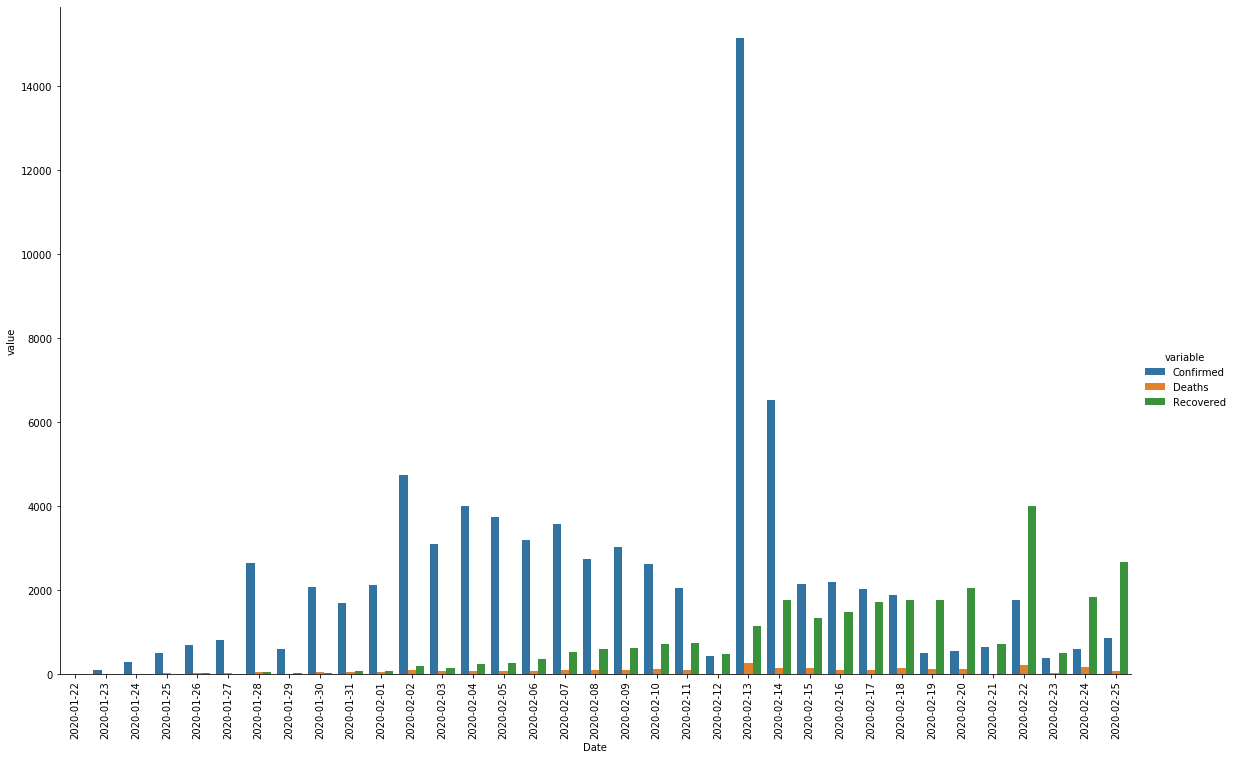

In [36]:
#corona confirmed,deaths and recovered mixed graph
mixed_plot=sns.catplot(x='Date', y='value', hue='variable', data=covid_data_diff_melted, kind='bar',height=10,aspect =1.6,legend=True)
mixed_plot.set_xticklabels( rotation=90)

In [55]:
fig = px.line(covid_data_diff_melted, x="Date",y='value', color='variable')
fig.show()

In [38]:
#country based analysis
covid_data_country=pd.DataFrame(covid_data.groupby(by='Country/Region').sum())
covid_data_country['country']=covid_data_country.index

In [56]:
covid_data_country.sort_values(['Confirmed','Deaths','Recovered'],ascending=[False,False,False])

,Confirmed,Deaths,Recovered,country,Death_ratio,Heal_ratio
Country/Region,,,,,,
Mainland China,1354794,36187,239064,Mainland China,0.743419,0.877140
Others,7256,15,4,Others,0.304632,0.155946
South Korea,3650,29,190,South Korea,0.410522,0.639687
Japan,1540,13,250,Japan,0.349470,0.752290
Singapore,1467,0,448,Singapore,-inf,0.837308
Hong Kong,1236,29,81,Hong Kong,0.472959,0.617230
Thailand,863,0,317,Thailand,-inf,0.851856
Italy,844,23,5,Italy,0.465334,0.238854
Taiwan,531,10,38,Taiwan,0.366960,0.579717


In [41]:
#Efficiency analysis
def cross_entropy(y,a):
    output = pd.Series(np.subtract(np.exp(a,2), np.exp(y,2)))
    return output

In [42]:
covid_data_country['Death_ratio']= np.log(covid_data_country['Deaths'])/np.log(covid_data_country['Confirmed'])
covid_data_country['Heal_ratio']=np.log(covid_data_country['Recovered'])/np.log(covid_data_country['Confirmed'])

C:\Users\palaghay\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning:

divide by zero encountered in log



In [48]:
covid_data_country_efficency_death= covid_data_country.sort_values(['Death_ratio','Heal_ratio'],ascending=[False,False], na_position='last')

In [49]:
covid_data_country_efficency_death.head(100)

,Confirmed,Deaths,Recovered,country,Death_ratio,Heal_ratio
Country/Region,,,,,,
Philippines,70,24,14,Philippines,0.748042,0.621175
Mainland China,1354794,36187,239064,Mainland China,0.743419,0.877140
Iran,252,49,0,Iran,0.703838,-inf
Hong Kong,1236,29,81,Hong Kong,0.472959,0.617230
Italy,844,23,5,Italy,0.465334,0.238854
France,283,11,57,France,0.424749,0.716161
South Korea,3650,29,190,South Korea,0.410522,0.639687
Taiwan,531,10,38,Taiwan,0.366960,0.579717
Japan,1540,13,250,Japan,0.349470,0.752290


In [50]:
def plot_builder_new(col_name,data_name,**kwargs):
    title = 'Corona Virus 2019-20'
    try:
        title = kwargs['title']
    except:
        title = 'Corona Virus 2020'
    plt.figure(figsize=(10,15))
    plt.xticks(rotation=90)
    plt.xlabel('Date', fontsize=18)
    plt.suptitle(title)
    plot_1=sns.barplot(x='country',y=col_name,data=data_name)
    plot_1

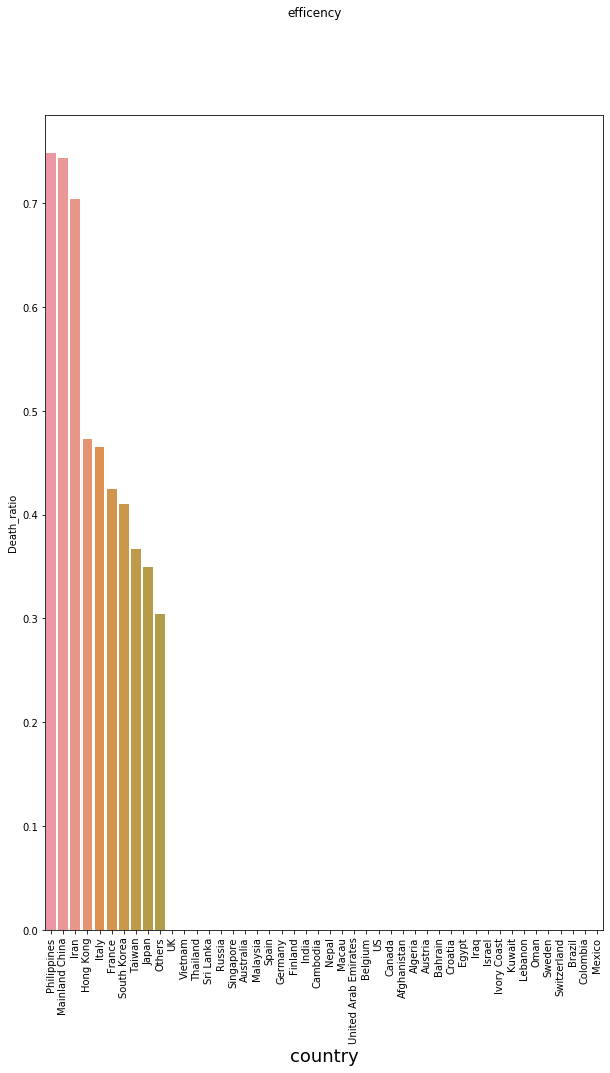

In [51]:
plot_builder_new('Death_ratio',covid_data_country_efficency_death,title='Death Efficency')